In [65]:
from xml.etree import ElementTree as ET
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def parse_time(time_str):
    t = datetime.strptime(time_str,"%H:%M:%S")
    
    delta = timedelta(hours=t.hour, minutes=t.minute, seconds=t.second)
    return delta

In [70]:
filepath_after = "/Users/clemens/Documents/courses/abmt/projects/abmt_project/simulations/original/simulation_output/" + "output_experienced_plans.xml"

In [74]:
def travel_minutes_from_file(path):
    tree = ET.parse(path)
    
    all_travel_times = [parse_time(l.get('trav_time')) for l in tree.findall("./person/plan/leg[@mode='car']")]
    all_travel_time_minutes = [t/timedelta(minutes=1) for t in all_travel_times]
    return np.array(all_travel_time_minutes)

(array([6.3535e+04, 1.4660e+04, 4.0550e+03, 1.1970e+03, 2.8800e+02,
        8.5000e+01, 3.0000e+01, 1.5000e+01, 1.5000e+01, 2.0000e+00]),
 array([1.66666667e-02, 1.03223333e+02, 2.06430000e+02, 3.09636667e+02,
        4.12843333e+02, 5.16050000e+02, 6.19256667e+02, 7.22463333e+02,
        8.25670000e+02, 9.28876667e+02, 1.03208333e+03]),
 <a list of 10 Patch objects>)

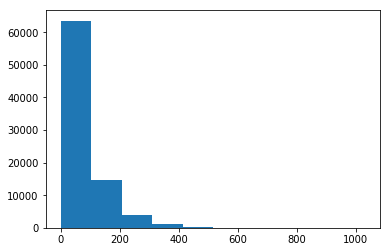

In [75]:
times_after = travel_minutes_from_file(filepath_after)
plt.hist(all_travel_time_minutes)

In [76]:
np.max(all_travel_time_minutes)/60

17.20138888888889

# before. I.e. Freeflow times

(array([4.8729e+04, 2.2228e+04, 8.6140e+03, 3.0460e+03, 8.3100e+02,
        3.0200e+02, 1.3400e+02, 3.9000e+01, 1.1000e+01, 4.0000e+00]),
 array([  0.        ,  10.21333333,  20.42666667,  30.64      ,
         40.85333333,  51.06666667,  61.28      ,  71.49333333,
         81.70666667,  91.92      , 102.13333333]),
 <a list of 10 Patch objects>)

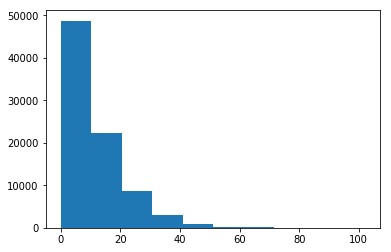

In [77]:
filepath_before = "/Users/clemens/Documents/courses/abmt/projects/abmt_project/simulations/original/" + "ile_de_france_population_diluted_caronly.xml"
times_before = travel_minutes_from_file(filepath_before)
plt.hist(times_before)

102.13333333333334